<H3> BEFORE STARTING </H3>


Hi every one i am [ujjwal-basnet] on the journey of machine learning . I am sharing my learning about standardization , why it is important , where we do  standarzation , what are its pros and convs 
....a

<h3 color = "red">
What is standardization</h3>
<h4>feature scalling is a method to scale numeric feature (columns) in same range or scale (for eg -1 , 0  , 1 ) 
</h4>

<h2>POINTS TO REMEMBER </h2>
MAEAN  = 0<br>
Standard Deviation = 1 <br>
We apply it on   independent variables <br> 
The result of standardization is Z called as Z-score normalization<br> 
[more ] 
    If data follow a normal distribution (gaussian distribution).

• If the original distribution is normal, then the standardized distribution will be normal.

• If the original distribution is skewed, then the standardized distribution of the variable will also be skewed

<h2> Formula To calculate  standardization </h2> 
<h1>z = (x(i_th) - mean) / std</h1>  
where <br> 
x is a data point<br>
mean is the mean of the feature<br>
std is the standard deviation of the feature<br>
z is the standardized value of x
                   

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('Social_Network_Ads.csv')

In [2]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
218,15666675,Female,46,96000,0
232,15813113,Male,40,107000,1
184,15759066,Female,33,60000,0
312,15733964,Female,38,50000,0
15,15697686,Male,29,80000,0


In [3]:
#extracting required  numeric input columns ( feature ) 
df = df.iloc[: , 2:] 

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
#tain test spit 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1 ) , df['Purchased'] , test_size = 0.3 )


In [6]:
#importing standardization functions 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)


In [9]:
#conveting into data frames 
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns.values ) 
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns.values)

In [15]:
x_train_scaled.describe().round(2)


,Age,EstimatedSalary
count,280.00,280.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.91,-1.68
25%,-0.76,-0.72
50%,-0.10,-0.00
75%,0.76,0.50
max,2.10,2.40


In [22]:
print(" The mean of scaled feature is " , x_train_scaled.mean().round(1))
print()
print("Mean of unscaled feature  " , x_train.mean().round(1))

 The mean of scaled feature is  Age               -0.0
EstimatedSalary   -0.0
dtype: float64

Mean of unscaled feature   Age                   38.0
EstimatedSalary    70642.9
dtype: float64


In [26]:
use cases 
It may remove the outliners 
If original data was skwed it may reduce skewness 


SyntaxError: invalid syntax (248431676.py, line 1)

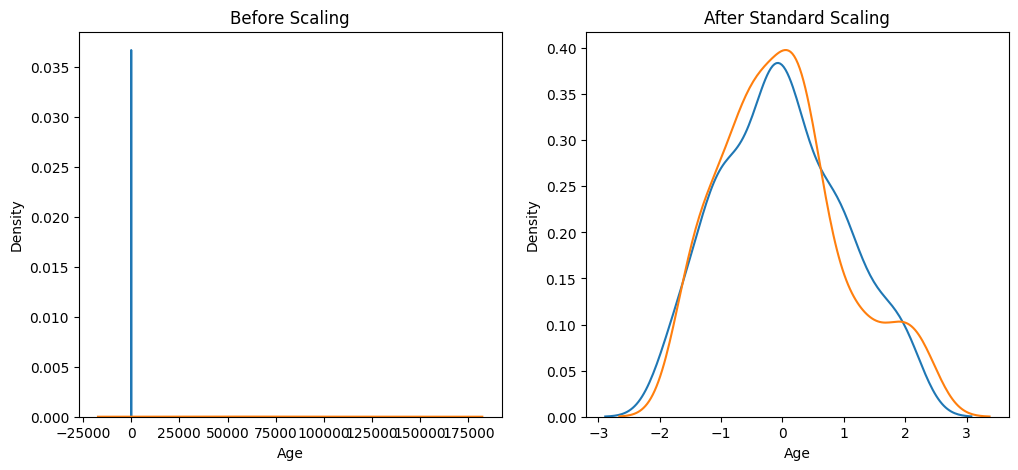

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

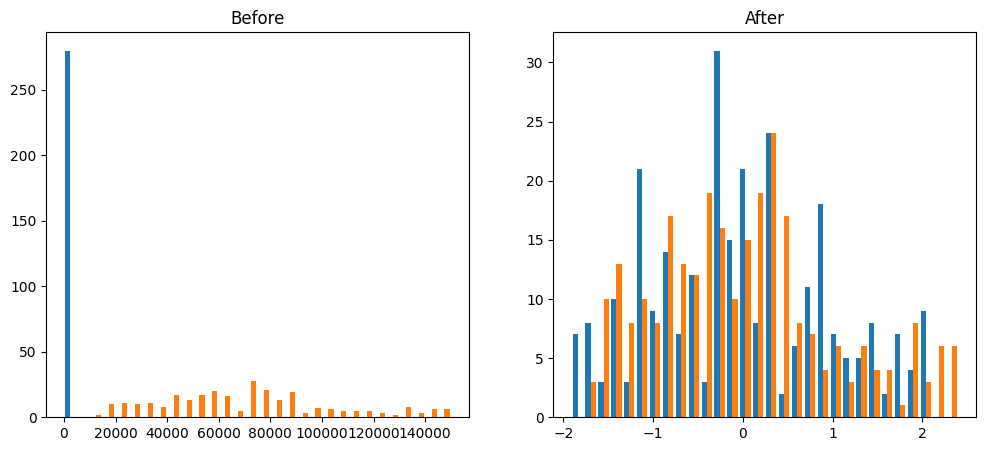

In [39]:
fig , (ax1 , ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 5 ) )
ax1.hist(x_train , bins = 30 )
ax2.hist(x_train_scaled , bins = 30 )
#setting title
ax1.set_title("Before" ) 
ax2.set_title("After")
plt.show()

In [47]:
x_train_scaled.skew()

Age                0.194925
EstimatedSalary    0.515018
dtype: float64

In [44]:
x_train.skew()

Age                0.194925
EstimatedSalary    0.515018
dtype: float64

In [56]:
#why standardlization 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr_scaled = LogisticRegression()
lr.fit(x_train  , y_train ) 
lr_scaled.fit(x_train_scaled   , y_train) 


LogisticRegression()

In [57]:
y_pred = lr.predict(x_test )
y_pred_scaled = lr.predict(x_test_scaled)

In [58]:
from sklearn.metrics import accuracy_score


In [59]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6833333333333333
Scaled 0.4083333333333333
